In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = 63

df = pd.read_csv('data/mental.csv')

In [14]:
new_column_names = ['is_self_employed', 'employee_count_bracket', 'is_tech_org', 'role_is_IT', 'empl_provides_mh_cov', 'knows_mh_cov_options',
                    'empl_discussed_mh','empl_offers_mh_rsrcs','anon_protec','if_askfor_mh_medical_leave_how_easy', 'discuss_mh_with_empl_wouldcause_neg_conseq', 'discuss_ph_with_empl_wouldcause_neg_conseq',
                    'comfy_discussing_mh_with_coworkers','comfy_discussing_mh_with_supervisors' , 'empl_takes_mh_asseriously_as_ph', 'observed_neg_conseq_for_coworkers_openabout_mh_inworkspace',
                    'has_medical_cov_incl_mh', 'knowsof_mh_resources','if_diag_would_reveal_toclients/bn_contacts', 'if_reveal_diag_toclient_didthis_impact_neg', 'if_diag_would_reveal_tocoworkers/employees',
                    'if_reveal_diag_tocoworker_didthis_impact_neg', 'productivity_isaffected_by_mh', 'percentage_worktime_affected_by_mh', 'has_prev_employers','prev_empl_provided_mh_benefits',
                    'was_aware_of_prevemployers_mhcare_options','prev_empl_discussed_mh', 'prev_empl_provided_mh_rsrc', 'prev_anon_protec', 'prev_discuss_mh_with_empl_wouldcause_neg_conseq',
                    'prev_discuss_ph_with_empl_wouldcause_neg_conseq', 'prev_wouldhavebeen_willing_discuss_mh_coworkers', 'prev_wouldhavebeen_willing_discuss_mh_supervisors',
                    'prev_empl_takes_mh_asseriously_as_ph', 'prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace', 'willingto_bringup_ph_interview', 'why', 'willingto_bringup_mh_interview',
                    'why2', 'believes_beingident_as_mh_wouldhurt_career', 'thinks_coworkers_wouldviewthem_neg_if_mh', 'howwilling_share_mh_with_friendsfamily',
                    'observed_badly_handled_response_to_mh_inworkplace', 'observed_madethem_notwantto_talk_about_mh', 'has_family_history_mh', 'hashad_mh_inpast', 'HAS_MH', 'diagnoses_notprof',
                    'conditions_suspected', 'hasbeen_diag_byprof', 'diagnoses_prof', 'sought_treatment', 'mh_interferes_w/work_effective_trt', 'mh_interferes_w/work_ineffective_trt',
                    'age', 'sex', 'country_livesin', 'us_state_livesin', 'country_worksin', 'us_state_worksin', 'work_position', 'is_remote_working']

df.columns = new_column_names


In [15]:
why_cols = [columns for columns in df.columns if 'why' in columns]

#dropping 'why' questions, as each one of them is too unique
for column in why_cols:
    df = df.drop(column, axis='columns')

In [16]:
#Replacing gender names to a male/female/other convention

df['sex']=df['sex'].replace(to_replace=['Male', 'male', 'Male ','M','m','man','Male.','male 9:1 female, roughly','Male (cis)','Sex is male','Man',
                              'cis male','Malr','Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                              'mail', 'M|', 'Male/genderqueer','male ','Cis Male', 'Male (trans, FtM)','cisdude','cis man','MALE','Cis male'], value='MALE')

df['sex']=df['sex'].replace(to_replace=['Female', 'female', 'I identify as female.','female ','Female assigned at birth ','F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
                                        'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female','genderqueer woman','mtf','fem', 'Female (props for making this a freeform field, though)',
                                        ' Female','Cis-woman','Transgender woman'
                                        ],value='FEMALE')

df['sex']=df['sex'].replace(to_replace=['Bigender', 'non-binary',
       'Genderfluid (born female)', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine', 'none of your business',
       'genderqueer', 'Human', 'Genderfluid', 'Enby', 'Queer', 'Agender',
       'Fluid', 'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'female-bodied; no feelings about gender',
       'AFAB'], value='OTHER')

In [17]:
def show_value_counts(df):
    for column in df.columns:
        print(df[column].value_counts(), end='\n\n')

In [18]:
def get_unique_conditions(cond_series):
    conditions = cond_series.unique()

    condition_unsep = set()
    for condition in conditions:
        condition_unsep.add(condition)

    condition_set = set()
    pipes = []

    for condition in condition_unsep:
        if '|' in condition:
            pipes.append(condition.split('|'))
        else:
            condition_set.add(condition)

    for cond_list in pipes:
        for cond in cond_list:
            condition_set.add(cond)
    
    return condition_set

In [19]:
unique_diagnosed_conditions_by_prof = get_unique_conditions(df["diagnoses_prof"].dropna())

In [20]:
#manually added based on unique_diagnosed_conditions_by_prof - faster to discern the actually unqique ones by hand
actually_unique_by_prof = set(['Autism Spectrum Disorder', 'Mood disorder', 'PTSD', 'PDD-NOS', 'Addictive Disorder', 'ADHD', 'ADD',
                   'Anxiety Disorder', 'Burnout', 'Dissociative Disorder', 'Eating Disorder', 'Gender Dysphoria', 
                   'Gender Identity Disorder', 'Intimate Disorder', 'MCD', 'OCD', 'Personality Disorder', 'Psychotic Disorder',
                   'SAD', 'Stress Response Syndromes','Substance Use Disorder','Suicidal Ideation'])


In [21]:
df.head(1)

,is_self_employed,employee_count_bracket,is_tech_org,role_is_IT,empl_provides_mh_cov,knows_mh_cov_options,empl_discussed_mh,empl_offers_mh_rsrcs,anon_protec,if_askfor_mh_medical_leave_how_easy,discuss_mh_with_empl_wouldcause_neg_conseq,discuss_ph_with_empl_wouldcause_neg_conseq,comfy_discussing_mh_with_coworkers,comfy_discussing_mh_with_supervisors,empl_takes_mh_asseriously_as_ph,observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,has_medical_cov_incl_mh,knowsof_mh_resources,if_diag_would_reveal_toclients/bn_contacts,if_reveal_diag_toclient_didthis_impact_neg,if_diag_would_reveal_tocoworkers/employees,if_reveal_diag_tocoworker_didthis_impact_neg,productivity_isaffected_by_mh,percentage_worktime_affected_by_mh,has_prev_employers,prev_empl_provided_mh_benefits,was_aware_of_prevemployers_mhcare_options,prev_empl_discussed_mh,prev_empl_provided_mh_rsrc,prev_anon_protec,prev_discuss_mh_with_empl_wouldcause_neg_conseq,prev_discuss_ph_with_empl_wouldcause_neg_conseq,prev_wouldhavebeen_willing_discuss_mh_coworkers,prev_wouldhavebeen_willing_discuss_mh_supervisors,prev_empl_takes_mh_asseriously_as_ph,prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,willingto_bringup_ph_interview,willingto_bringup_mh_interview,believes_beingident_as_mh_wouldhurt_career,thinks_coworkers_wouldviewthem_neg_if_mh,howwilling_share_mh_with_friendsfamily,observed_badly_handled_response_to_mh_inworkplace,observed_madethem_notwantto_talk_about_mh,has_family_history_mh,hashad_mh_inpast,HAS_MH,diagnoses_notprof,conditions_suspected,hasbeen_diag_byprof,diagnoses_prof,sought_treatment,mh_interferes_w/work_effective_trt,mh_interferes_w/work_ineffective_trt,age,sex,country_livesin,us_state_livesin,country_worksin,us_state_worksin,work_position,is_remote_working
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,MALE,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes


In [22]:
df.head()

,is_self_employed,employee_count_bracket,is_tech_org,role_is_IT,empl_provides_mh_cov,knows_mh_cov_options,empl_discussed_mh,empl_offers_mh_rsrcs,anon_protec,if_askfor_mh_medical_leave_how_easy,discuss_mh_with_empl_wouldcause_neg_conseq,discuss_ph_with_empl_wouldcause_neg_conseq,comfy_discussing_mh_with_coworkers,comfy_discussing_mh_with_supervisors,empl_takes_mh_asseriously_as_ph,observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,has_medical_cov_incl_mh,knowsof_mh_resources,if_diag_would_reveal_toclients/bn_contacts,if_reveal_diag_toclient_didthis_impact_neg,if_diag_would_reveal_tocoworkers/employees,if_reveal_diag_tocoworker_didthis_impact_neg,productivity_isaffected_by_mh,percentage_worktime_affected_by_mh,has_prev_employers,prev_empl_provided_mh_benefits,was_aware_of_prevemployers_mhcare_options,prev_empl_discussed_mh,prev_empl_provided_mh_rsrc,prev_anon_protec,prev_discuss_mh_with_empl_wouldcause_neg_conseq,prev_discuss_ph_with_empl_wouldcause_neg_conseq,prev_wouldhavebeen_willing_discuss_mh_coworkers,prev_wouldhavebeen_willing_discuss_mh_supervisors,prev_empl_takes_mh_asseriously_as_ph,prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,willingto_bringup_ph_interview,willingto_bringup_mh_interview,believes_beingident_as_mh_wouldhurt_career,thinks_coworkers_wouldviewthem_neg_if_mh,howwilling_share_mh_with_friendsfamily,observed_badly_handled_response_to_mh_inworkplace,observed_madethem_notwantto_talk_about_mh,has_family_history_mh,hashad_mh_inpast,HAS_MH,diagnoses_notprof,conditions_suspected,hasbeen_diag_byprof,diagnoses_prof,sought_treatment,mh_interferes_w/work_effective_trt,mh_interferes_w/work_ineffective_trt,age,sex,country_livesin,us_state_livesin,country_worksin,us_state_worksin,work_position,is_remote_working
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,MALE,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,MALE,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,1,Not applicable to me,Not applicable to me,38,MALE,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,Maybe,"Yes, I think it would",Maybe,Neutral,No,NaN,No,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobi

<Axes: xlabel='sex', ylabel='count'>

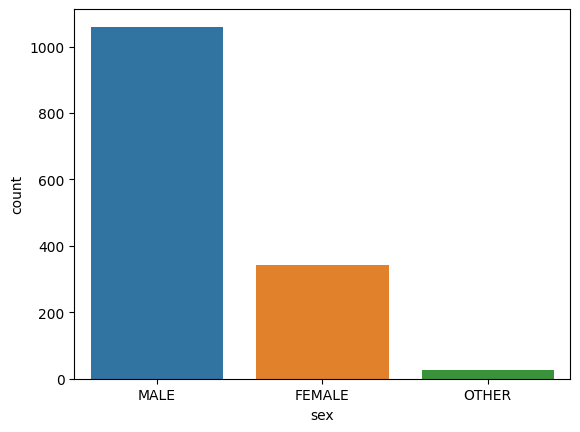

In [23]:
sns.countplot(x=df['sex'])